In [108]:
import numpy as np
import matplotlib.pyplot as plt

Lets just create a dummy dataset with 2 features ```x1``` & ```x2```. Here we can see that ```x2``` is nothing but a linear combination of ```x1``` with some added gaussian noise. We did this to ensure that our dataset infact has only a single important feature out of these two.

In [10]:
x1 = np.linspace(0, 100, 1000)
x2 = x1 + 10 * np.random.randn(1000)

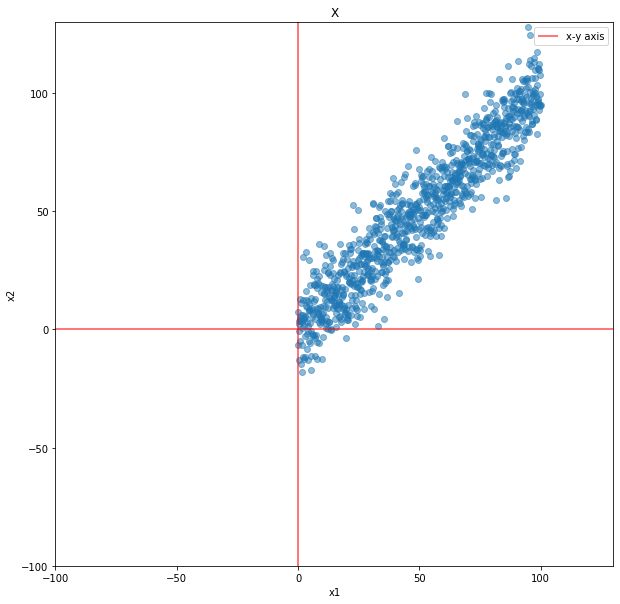

In [93]:
# Visualizing our dummy dataset. Notice the linear relationship.
plt.figure(figsize=(10,10))
plt.scatter(x1, x2, alpha=0.5)
plt.xlabel("x1")
plt.ylabel("x2")

# Specifying the x and y direction ticks
plt.xlim(-100,130)
plt.ylim(-100,130)

# Plot the horizontal and vertical lines to visualize the origin
plt.hlines(0, -100, 130, color="red",alpha=0.7, label="x-y axis")
plt.vlines(0, -100, 130, color="red", alpha=0.7)

plt.title("X")
plt.legend()
plt.show()

In [23]:
# Using the 2 features created, lets stack them together to create our dataset X
X = np.hstack((x1.reshape(-1,1), x2.reshape(-1,1)))

In [24]:
# Notice the number of features in our dummy dataset (2)
X.shape

(1000, 2)

In [25]:
# As discussed, lets standardize it
X_norm = (X - X.mean())/X.std()

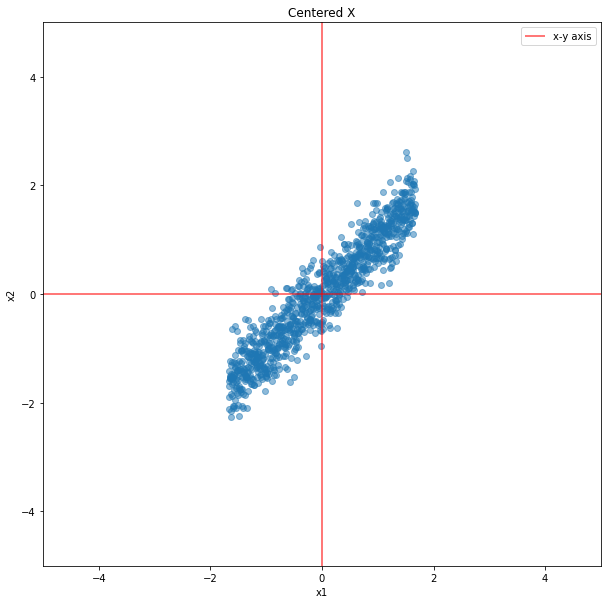

In [89]:
# Visualizing our standardized dataset. Notice how it is now centered across the origin
plt.figure(figsize=(10,10))
plt.scatter(X_norm[:,0], X_norm[:,1], alpha=0.5)
plt.xlabel("x1")
plt.ylabel("x2")

# Specifying the x and y direction ticks
plt.xlim(-5,5)
plt.ylim(-5,5)

# Plot the horizontal and vertical lines to visualize the origin
plt.hlines(0, -5, 5, color="red", alpha=0.7, label="x-y axis")
plt.vlines(0, -5, 5, color="red", alpha=0.7)

plt.title("Centered X")
plt.legend()
plt.show()

Now lets compute X<sup>T</sup>X, remember from the derivation? And lets call it ```C```

In [152]:
C = X_norm.T.dot(X_norm)

Now, we need to calculate the eigen values and corresponding eigen vectors of the matrix ```C```. For that, we will be using the function ```np.linalg.eig```.

This function takes a square matrix and does the eigen value decomposition and returns the eigen value and eigen vectors as a numpy array.

It is highly recommended to check the documentation using ```np.linalg.eig?```

In [157]:
eigen_val, eigen_vectors = np.linalg.eig(C)

In [158]:
print("Eigen Values of C are:", eigen_val)
print("Corresponding Eigen Vectors of C are:", eigen_vectors)

Eigen Values of C are: [  55.58998707 1944.41001293]
Corresponding Eigen Vectors of C are: [[-0.73118812 -0.68217589]
 [ 0.68217589 -0.73118812]]


Recall that the eigen vector associated with the highest eigen value is the direction of highest variance in the dataset. 

Hence, we calculate the index of the highest eigen value using ```np.argmax``` then take its corresponding eigen vector and call it ```v```. Recall that ```v``` is called the 1<sup>st</sup> Principal Component of the data.

In [159]:
v = eigen_vectors[:, np.argmax(eigen_val)]

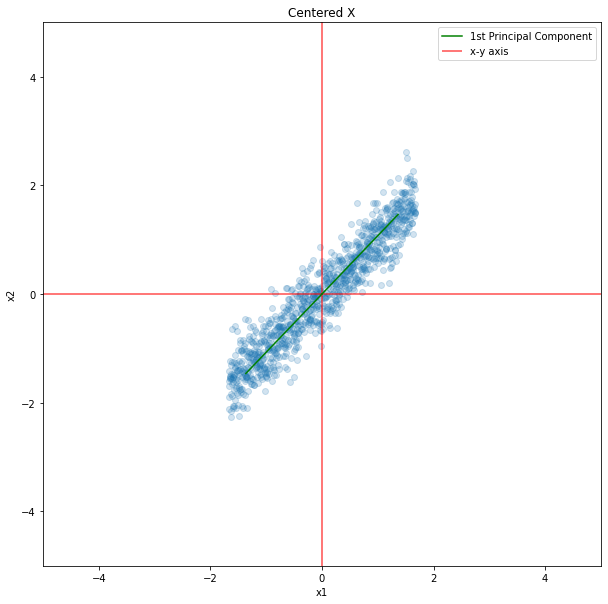

In [172]:
plt.figure(figsize=(10,10))
plt.scatter(X_norm[:,0], X_norm[:,1], alpha=0.2)
plt.xlabel("x1")
plt.ylabel("x2")

plt.xlim(-5,5)
plt.ylim(-5,5)

plt.hlines(0, -5, 5, color="red", alpha=0.7,label="x-y axis")
plt.vlines(0, -5, 5, color="red",alpha=0.7)

# Plotting the eigen vector by scaling the vector to both its side to visualize the direction better
plt.plot([0, v[0]*2], [0, v[1]*2], color="green", label="1st Principal Component")
plt.plot([0, v[0]*-2], [0, v[1]*-2], color="green")

plt.title("Centered X")
plt.legend()
plt.show()

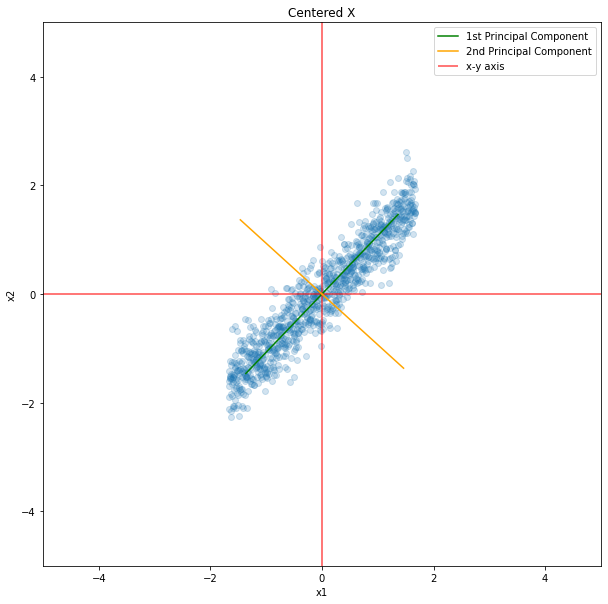

In [161]:
plt.figure(figsize=(10,10))
plt.scatter(X_norm[:,0], X_norm[:,1], alpha=0.2)
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.hlines(0, -5, 5, color="red", alpha=0.7,label="x-y axis")
plt.vlines(0, -5, 5, color="red",alpha=0.7)

## Visualizing both the directions or both the eigen vectors
# 1st
v1 = eigen_vectors[:, 1]
plt.plot([0, v1[0]*2], [0, v1[1]*2], color="green", label="1st Principal Component")
plt.plot([0, v1[0]*-2], [0, v1[1]*-2], color="green")

# 2nd
v2 = eigen_vectors[:, 0]
plt.plot([0, v2[0]*2], [0, v2[1]*2], color="orange", label="2nd Principal Component")
plt.plot([0, v2[0]*-2], [0, v2[1]*-2], color="orange")

plt.title("Centered X")
plt.legend()
plt.show()

Now as we have the direction of the most variance, we can now just simply project the data points to that direction and get the reduced dataset (means the dataset with reduced dimensionality \[2 -> 1 in this case\])

In [162]:
v = eigen_vectors[:, np.argmax(eigen_val)]

# Taking the projection or dot product. Remember the magnitude of v is 1
X_reduced = X_norm.dot(v)

In [181]:
# Notice the shape of the reduced data, there is only 1 feature
X_reduced.shape

(1000,)

Now lets check out the sklearn implementation of PCA

In [164]:
from sklearn.decomposition import PCA

In [165]:
pca = PCA(n_components=1) # n_components means the number of Principal Components we need. In our case, we need only the 1st PC.

In [166]:
pca.fit(X_norm)

PCA(n_components=1)

In [182]:
X_reduced_sk = pca.transform(X_norm) # Lets compute the reduced dataset

In [184]:
X_reduced_sk.shape # Notice the shape

(1000, 1)

Now lets check if the components that sklearn computed is same as our scratch approach.

In [169]:
pca.components_

array([[0.68217589, 0.73118811]])

In [170]:
v

array([-0.68217589, -0.73118812])

At first glance, you might think they are not equal, but if you look closely, ```pca.components_``` and ```v``` is exactly same but in opposite directions. Does that matter? No. Why? Because we were only concerned about the axis to which the dataset has maximum variance. Since both of these are on the same axis, we are good to go. 

If you want to know why Sklearn computed the inverted(opposite) eigen vector then refer to this [answer](https://stackoverflow.com/a/44847053/9748372).

PS. It is deliberately inverted to be consistent across runs.